In [1]:
# 设置cell宽度
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# 警告
import warnings
warnings.filterwarnings('ignore')

# matplotlib
from tqdm import tqdm
from pprint import pprint
from matplotlib import pylab
from seaborn import set_style
set_style("whitegrid")
%matplotlib inline

# matplotlib 中文乱码、正负号乱码
from platform import system
os_name = system()
print(os_name)

from matplotlib import rcParams
rcParams["axes.unicode_minus"]=False #该语句解决图像中的“-”负号的乱码问题
if os_name == r"Windows":
    rcParams["font.sans-serif"]=["SimHei"] #设置字体
elif os_name == r"Darwin":
    rcParams['font.family'] = 'PingFang HK'
else:
    pass


# 调整运行根目录
import os
# os.chdir(os.path.abspath(os.path.dirname(os.getcwd())))
# os.chdir(os.path.abspath(os.path.dirname(os.getcwd())))
#os.chdir(os.path.abspath(os.path.dirname(os.getcwd())))
print(os.getcwd()) 

# Dataframe显示格式
from pandas import set_option
set_option('display.max_info_rows',1000)
set_option('display.max_rows',1000)
set_option('display.max_columns',1000)
set_option('display.max_colwidth',1000)
set_option('display.float_format',lambda x : '%.4f' % x)

Linux
/home/jquser


In [2]:
from dateutil.parser import parse
from pandas import concat
from matplotlib import pyplot

In [3]:
data = get_price("000016.XSHG", start_date="2015-01-01", end_date="2023-01-08")
data["year"] = data.index.map(lambda x: x.strftime("%Y"))

row_df = []
for year, row in data.groupby("year"):
    start_limit = "{}-01-01".format(year)
    end_limit = "{}-03-31".format(year)
    row = row.loc[start_limit:end_limit]
    row["date"] = row.index
    row["pre_date"] = row["date"].shift(1)
    row["date_diff"] = row["date"] - row["pre_date"]
    row["date_diff"] = row["date_diff"].map(lambda x: x.days)
    row = row.sort_values("date_diff", ascending=False)
    row_df.append(row.iloc[0])
row_df = concat(row_df, axis=1).T
row_df = row_df.iloc[:-1]

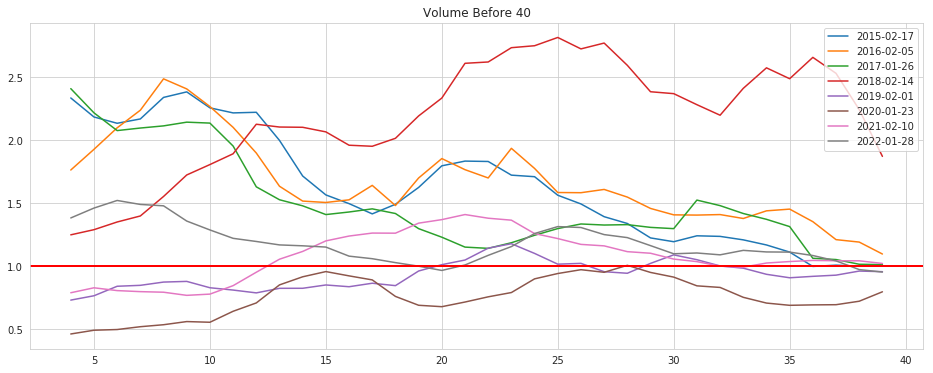

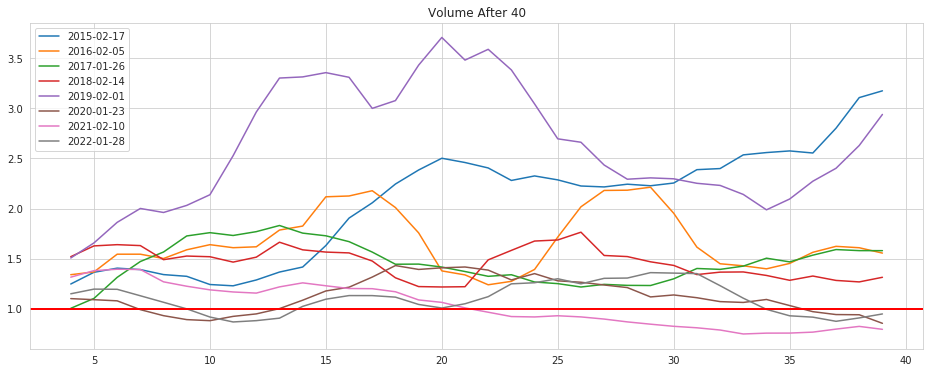

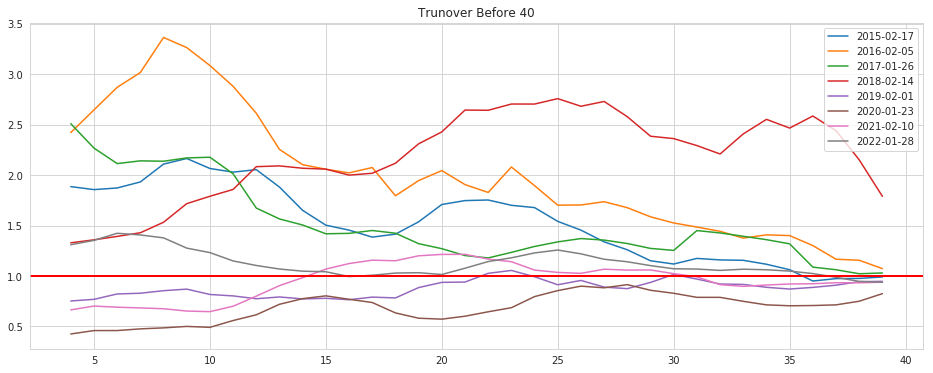

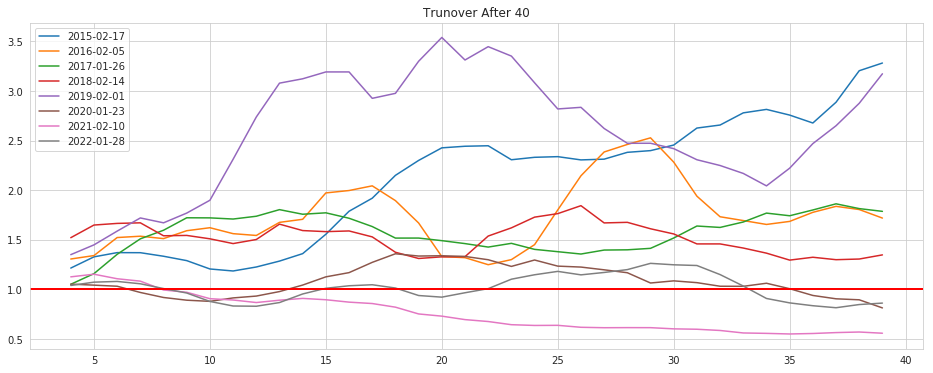

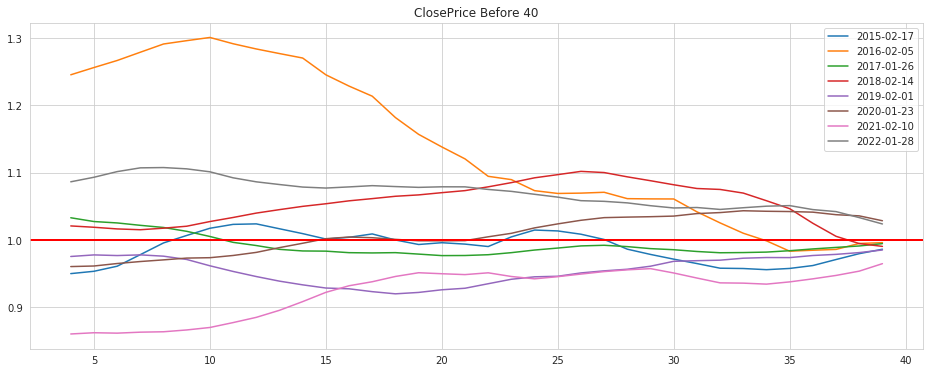

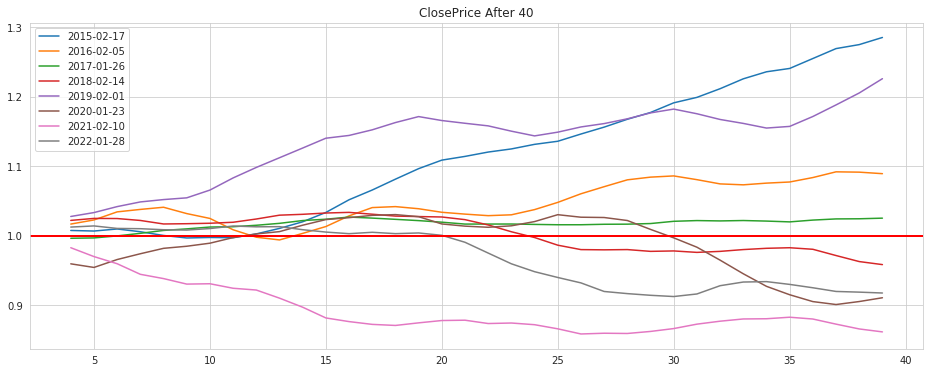

In [10]:
index_symbol = "000300.XSHG"


pre_df = []
after_df = []
for date in row_df.index:
    start_date = row_df.loc[date, "date"].strftime("%Y-%m-%d")
    end_date = row_df.loc[date, "pre_date"].strftime("%Y-%m-%d")

    pre_row = get_price(index_symbol, end_date=end_date, count=40)
    pre_row = pre_row.reset_index(drop=False)["volume"]
    pre_row.name = end_date
    pre_df.append(pre_row)
    
    row = get_price(index_symbol, start_date=end_date, end_date="2023-01-08").iloc[:40]
    row = row.reset_index(drop=False)["volume"]
    row.name = end_date
    after_df.append(row)
pre_df = concat(pre_df, axis=1).T.dropna().T
after_df = concat(after_df, axis=1).T.dropna().T

pre_df = pre_df / pre_df.iloc[-1]
pre_df.rolling(5).mean().plot(figsize=(16, 6), title="Volume Before 40")
pyplot.axhline(1, color="r", linewidth=2)

after_df = after_df / after_df.iloc[0]
after_df.rolling(5).mean().plot(figsize=(16, 6), title="Volume After 40")
pyplot.axhline(1, color="r", linewidth=2)


pre_df = []
after_df = []
for date in row_df.index:
    start_date = row_df.loc[date, "date"].strftime("%Y-%m-%d")
    end_date = row_df.loc[date, "pre_date"].strftime("%Y-%m-%d")

    pre_row = get_price(index_symbol, end_date=end_date, count=40)
    pre_row = pre_row.reset_index(drop=False)["money"]
    pre_row.name = end_date
    pre_df.append(pre_row)
    
    row = get_price(index_symbol, start_date=end_date, end_date="2023-01-08").iloc[:40]
    row = row.reset_index(drop=False)["money"]
    row.name = end_date
    after_df.append(row)
pre_df = concat(pre_df, axis=1).T.dropna().T
after_df = concat(after_df, axis=1).T.dropna().T

pre_df = pre_df / pre_df.iloc[-1]
pre_df.rolling(5).mean().plot(figsize=(16, 6), title="Trunover Before 40")
pyplot.axhline(1, color="r", linewidth=2)

after_df = after_df / after_df.iloc[0]
after_df.rolling(5).mean().plot(figsize=(16, 6), title="Trunover After 40")
pyplot.axhline(1, color="r", linewidth=2)




pre_df = []
after_df = []
for date in row_df.index:
    start_date = row_df.loc[date, "date"].strftime("%Y-%m-%d")
    end_date = row_df.loc[date, "pre_date"].strftime("%Y-%m-%d")

    pre_row = get_price(index_symbol, end_date=end_date, count=40)
    pre_row = pre_row.reset_index(drop=False)["close"]
    pre_row.name = end_date
    pre_df.append(pre_row)
    
    row = get_price(index_symbol, start_date=end_date, end_date="2023-01-08").iloc[:40]
    row = row.reset_index(drop=False)["close"]
    row.name = end_date
    after_df.append(row)
pre_df = concat(pre_df, axis=1).T.dropna().T
after_df = concat(after_df, axis=1).T.dropna().T

pre_df = pre_df / pre_df.iloc[-1]
pre_df.rolling(5).mean().plot(figsize=(16, 6), title="ClosePrice Before 40")
pyplot.axhline(1, color="r", linewidth=2)

after_df = after_df / after_df.iloc[0]
after_df.rolling(5).mean().plot(figsize=(16, 6), title="ClosePrice After 40")
pyplot.axhline(1, color="r", linewidth=2)

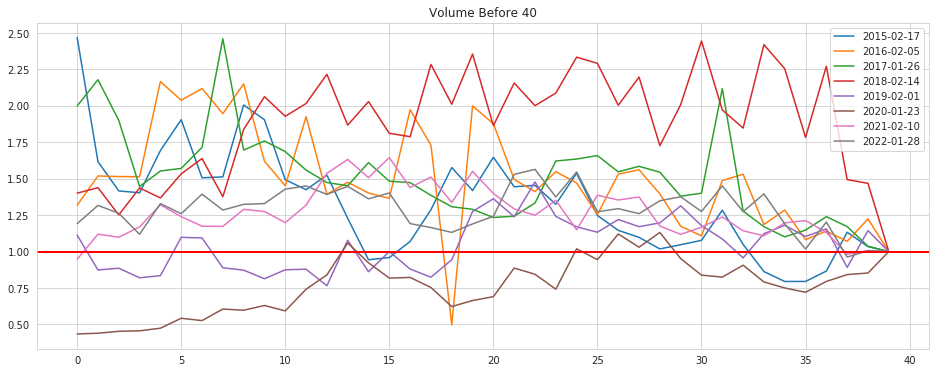

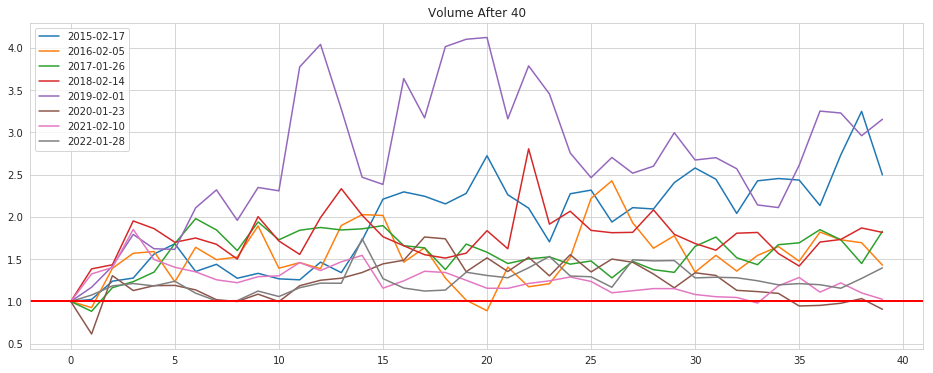

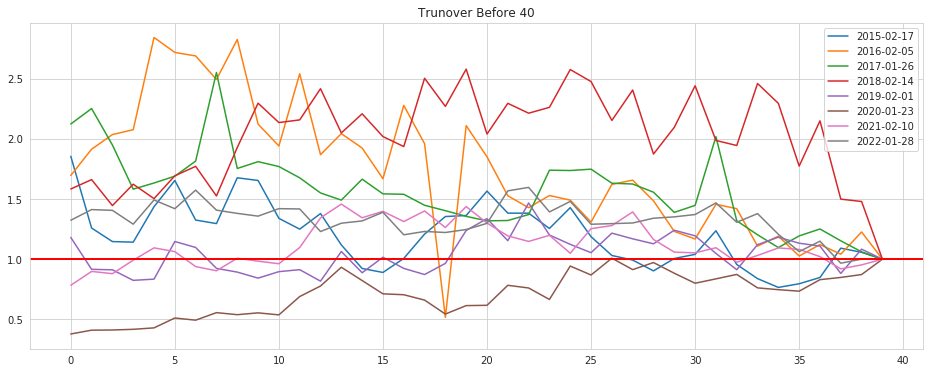

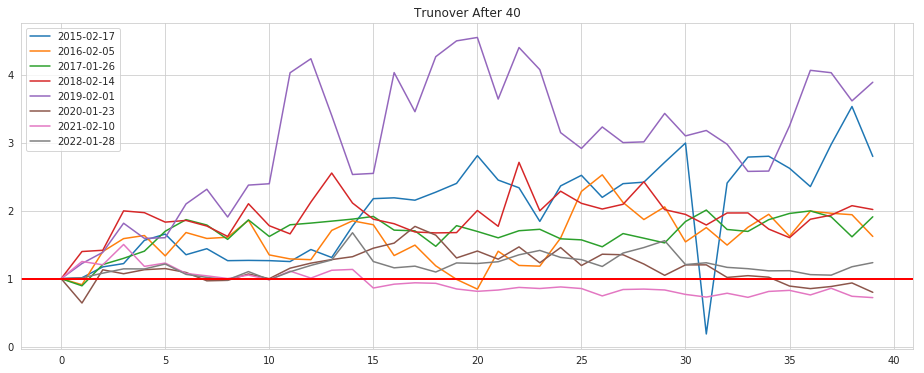

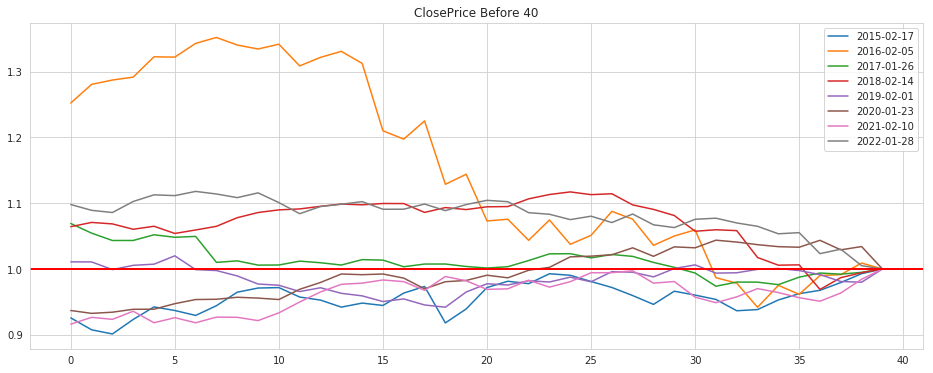

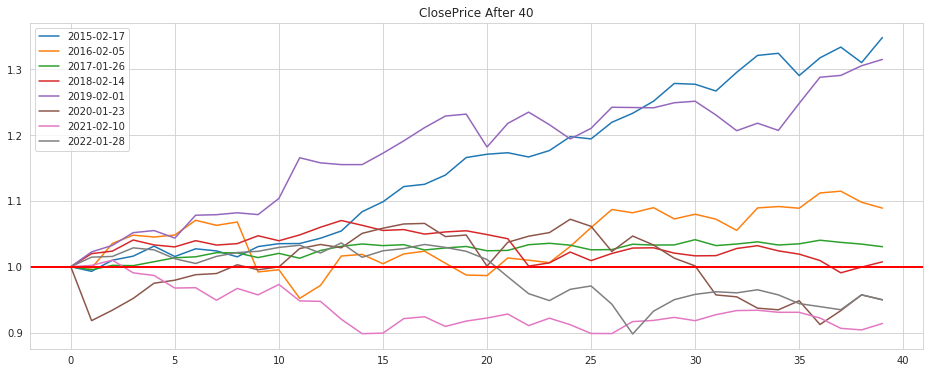

In [11]:
index_symbol = "000985.XSHG"


pre_df = []
after_df = []
for date in row_df.index:
    start_date = row_df.loc[date, "date"].strftime("%Y-%m-%d")
    end_date = row_df.loc[date, "pre_date"].strftime("%Y-%m-%d")

    pre_row = get_price(index_symbol, end_date=end_date, count=40)
    pre_row = pre_row.reset_index(drop=False)["volume"]
    pre_row.name = end_date
    pre_df.append(pre_row)
    
    row = get_price(index_symbol, start_date=end_date, end_date="2023-01-08").iloc[:40]
    row = row.reset_index(drop=False)["volume"]
    row.name = end_date
    after_df.append(row)
pre_df = concat(pre_df, axis=1).T.dropna().T
after_df = concat(after_df, axis=1).T.dropna().T

pre_df = pre_df / pre_df.iloc[-1]
pre_df.plot(figsize=(16, 6), title="Volume Before 40")
pyplot.axhline(1, color="r", linewidth=2)

after_df = after_df / after_df.iloc[0]
after_df.plot(figsize=(16, 6), title="Volume After 40")
pyplot.axhline(1, color="r", linewidth=2)


pre_df = []
after_df = []
for date in row_df.index:
    start_date = row_df.loc[date, "date"].strftime("%Y-%m-%d")
    end_date = row_df.loc[date, "pre_date"].strftime("%Y-%m-%d")

    pre_row = get_price(index_symbol, end_date=end_date, count=40)
    pre_row = pre_row.reset_index(drop=False)["money"]
    pre_row.name = end_date
    pre_df.append(pre_row)
    
    row = get_price(index_symbol, start_date=end_date, end_date="2023-01-08").iloc[:40]
    row = row.reset_index(drop=False)["money"]
    row.name = end_date
    after_df.append(row)
pre_df = concat(pre_df, axis=1).T.dropna().T
after_df = concat(after_df, axis=1).T.dropna().T

pre_df = pre_df / pre_df.iloc[-1]
pre_df.plot(figsize=(16, 6), title="Trunover Before 40")
pyplot.axhline(1, color="r", linewidth=2)

after_df = after_df / after_df.iloc[0]
after_df.plot(figsize=(16, 6), title="Trunover After 40")
pyplot.axhline(1, color="r", linewidth=2)




pre_df = []
after_df = []
for date in row_df.index:
    start_date = row_df.loc[date, "date"].strftime("%Y-%m-%d")
    end_date = row_df.loc[date, "pre_date"].strftime("%Y-%m-%d")

    pre_row = get_price(index_symbol, end_date=end_date, count=40)
    pre_row = pre_row.reset_index(drop=False)["close"]
    pre_row.name = end_date
    pre_df.append(pre_row)
    
    row = get_price(index_symbol, start_date=end_date, end_date="2023-01-08").iloc[:40]
    row = row.reset_index(drop=False)["close"]
    row.name = end_date
    after_df.append(row)
pre_df = concat(pre_df, axis=1).T.dropna().T
after_df = concat(after_df, axis=1).T.dropna().T

pre_df = pre_df / pre_df.iloc[-1]
pre_df.plot(figsize=(16, 6), title="ClosePrice Before 40")
pyplot.axhline(1, color="r", linewidth=2)

after_df = after_df / after_df.iloc[0]
after_df.plot(figsize=(16, 6), title="ClosePrice After 40")
pyplot.axhline(1, color="r", linewidth=2)

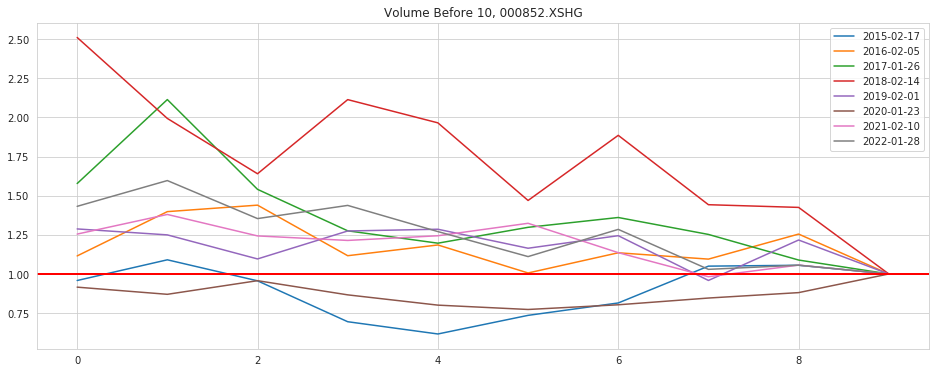

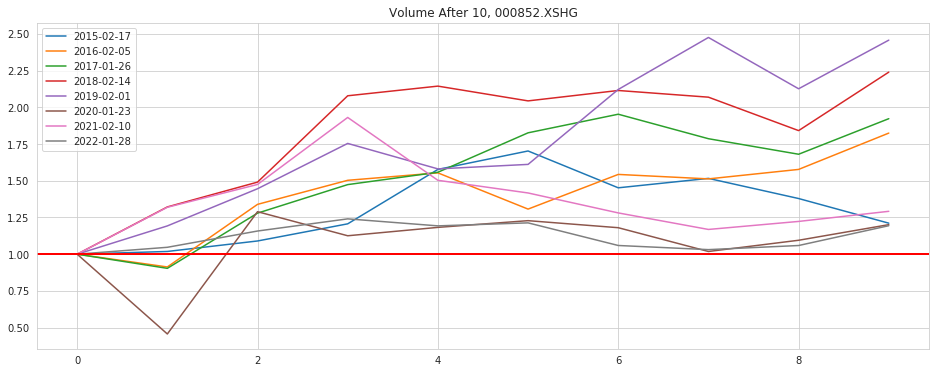

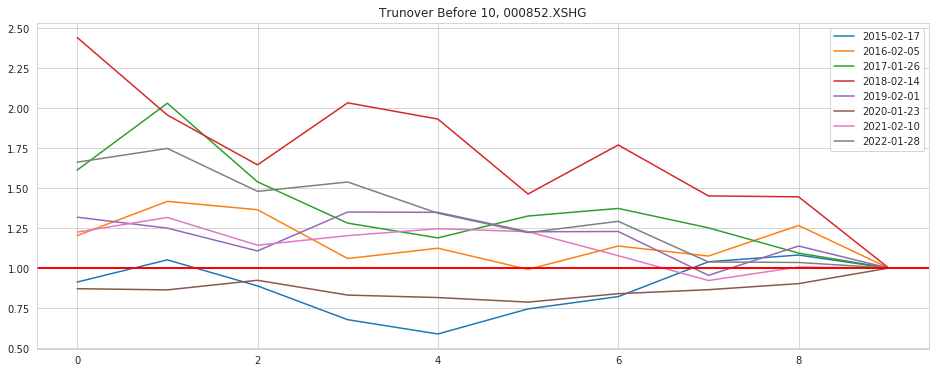

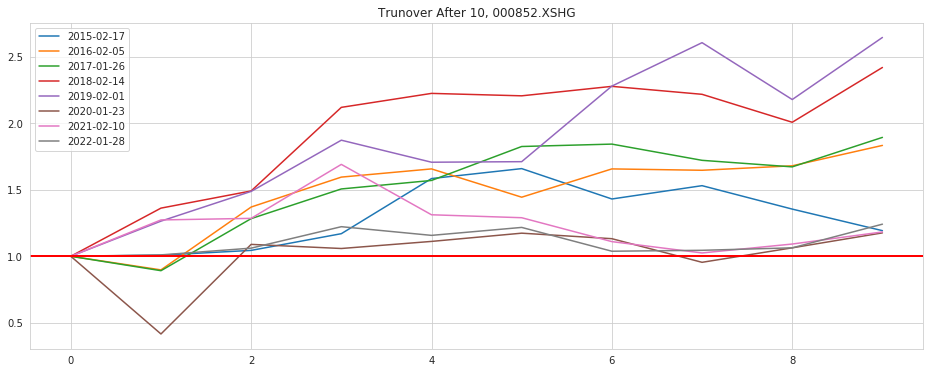

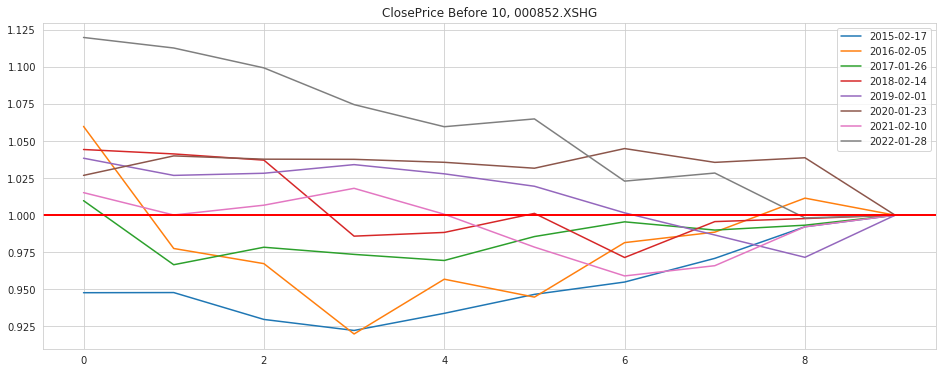

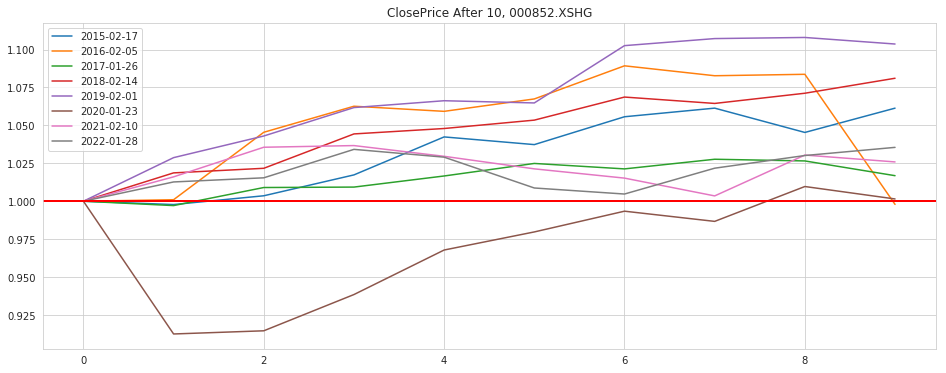

In [12]:
index_symbol = "000852.XSHG"
count_num = 10


pre_df = []
after_df = []
for date in row_df.index:
    start_date = row_df.loc[date, "date"].strftime("%Y-%m-%d")
    end_date = row_df.loc[date, "pre_date"].strftime("%Y-%m-%d")

    pre_row = get_price(index_symbol, end_date=end_date, count=count_num)
    pre_row = pre_row.reset_index(drop=False)["volume"]
    pre_row.name = end_date
    pre_df.append(pre_row)
    
    row = get_price(index_symbol, start_date=end_date, end_date="2023-01-08").iloc[:count_num]
    row = row.reset_index(drop=False)["volume"]
    row.name = end_date
    after_df.append(row)
pre_df = concat(pre_df, axis=1).T.dropna().T
after_df = concat(after_df, axis=1).T.dropna().T

pre_df = pre_df / pre_df.iloc[-1]
pre_df.plot(figsize=(16, 6), title="Volume Before {}, {}".format(count_num, index_symbol))
pyplot.axhline(1, color="r", linewidth=2)

after_df = after_df / after_df.iloc[0]
after_df.plot(figsize=(16, 6), title="Volume After {}, {}".format(count_num,index_symbol))
pyplot.axhline(1, color="r", linewidth=2)


pre_df = []
after_df = []
for date in row_df.index:
    start_date = row_df.loc[date, "date"].strftime("%Y-%m-%d")
    end_date = row_df.loc[date, "pre_date"].strftime("%Y-%m-%d")

    pre_row = get_price(index_symbol, end_date=end_date, count=count_num)
    pre_row = pre_row.reset_index(drop=False)["money"]
    pre_row.name = end_date
    pre_df.append(pre_row)
    
    row = get_price(index_symbol, start_date=end_date, end_date="2023-01-08").iloc[:count_num]
    row = row.reset_index(drop=False)["money"]
    row.name = end_date
    after_df.append(row)
pre_df = concat(pre_df, axis=1).T.dropna().T
after_df = concat(after_df, axis=1).T.dropna().T

pre_df = pre_df / pre_df.iloc[-1]
pre_df.plot(figsize=(16, 6), title="Trunover Before {}, {}".format(count_num,index_symbol))
pyplot.axhline(1, color="r", linewidth=2)

after_df = after_df / after_df.iloc[0]
after_df.plot(figsize=(16, 6), title="Trunover After {}, {}".format(count_num,index_symbol))
pyplot.axhline(1, color="r", linewidth=2)




pre_df = []
after_df = []
for date in row_df.index:
    start_date = row_df.loc[date, "date"].strftime("%Y-%m-%d")
    end_date = row_df.loc[date, "pre_date"].strftime("%Y-%m-%d")

    pre_row = get_price(index_symbol, end_date=end_date, count=count_num)
    pre_row = pre_row.reset_index(drop=False)["close"]
    pre_row.name = end_date
    pre_df.append(pre_row)
    
    row = get_price(index_symbol, start_date=end_date, end_date="2023-01-08").iloc[:count_num]
    row = row.reset_index(drop=False)["close"]
    row.name = end_date
    after_df.append(row)
pre_df = concat(pre_df, axis=1).T.dropna().T
after_df = concat(after_df, axis=1).T.dropna().T

pre_df = pre_df / pre_df.iloc[-1]
pre_df.plot(figsize=(16, 6), title="ClosePrice Before {}, {}".format(count_num,index_symbol))
pyplot.axhline(1, color="r", linewidth=2)

after_df = after_df / after_df.iloc[0]
after_df.plot(figsize=(16, 6), title="ClosePrice After {}, {}".format(count_num,index_symbol))
pyplot.axhline(1, color="r", linewidth=2)

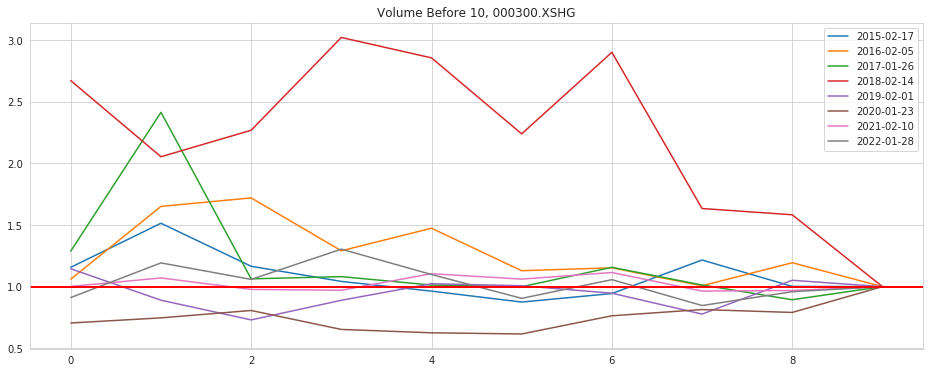

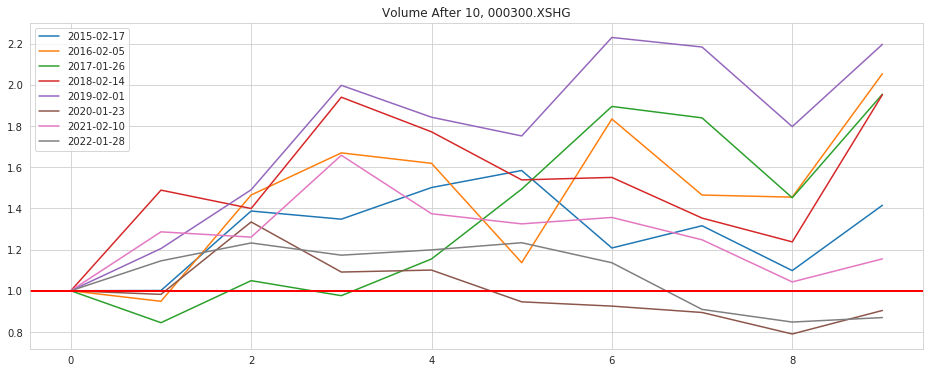

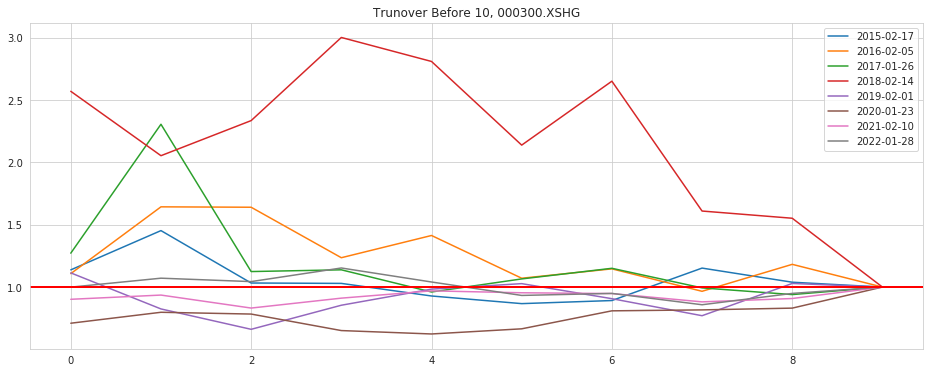

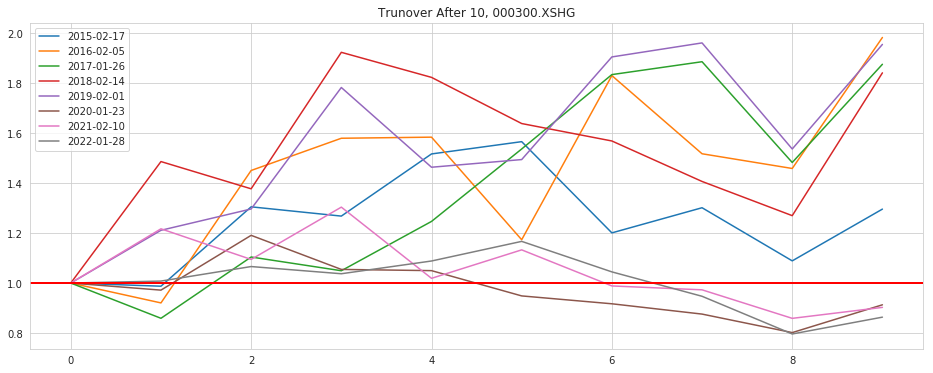

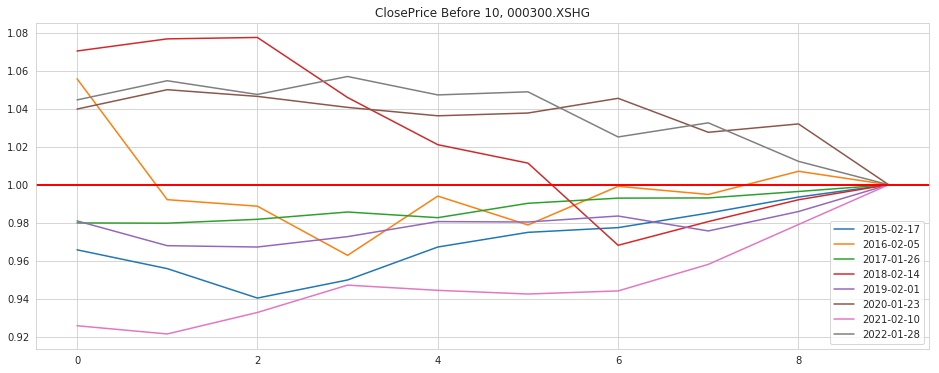

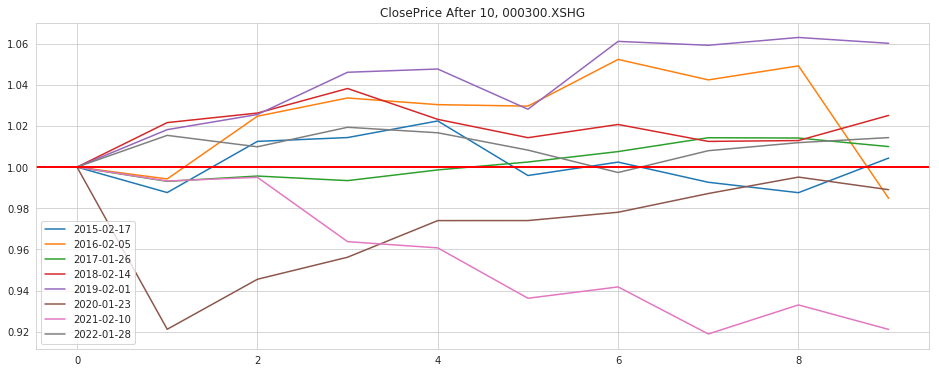

In [13]:
index_symbol = "000300.XSHG"
count_num = 10


pre_df = []
after_df = []
for date in row_df.index:
    start_date = row_df.loc[date, "date"].strftime("%Y-%m-%d")
    end_date = row_df.loc[date, "pre_date"].strftime("%Y-%m-%d")

    pre_row = get_price(index_symbol, end_date=end_date, count=count_num)
    pre_row = pre_row.reset_index(drop=False)["volume"]
    pre_row.name = end_date
    pre_df.append(pre_row)
    
    row = get_price(index_symbol, start_date=end_date, end_date="2023-01-08").iloc[:count_num]
    row = row.reset_index(drop=False)["volume"]
    row.name = end_date
    after_df.append(row)
pre_df = concat(pre_df, axis=1).T.dropna().T
after_df = concat(after_df, axis=1).T.dropna().T

pre_df = pre_df / pre_df.iloc[-1]
pre_df.plot(figsize=(16, 6), title="Volume Before {}, {}".format(count_num, index_symbol))
pyplot.axhline(1, color="r", linewidth=2)

after_df = after_df / after_df.iloc[0]
after_df.plot(figsize=(16, 6), title="Volume After {}, {}".format(count_num,index_symbol))
pyplot.axhline(1, color="r", linewidth=2)


pre_df = []
after_df = []
for date in row_df.index:
    start_date = row_df.loc[date, "date"].strftime("%Y-%m-%d")
    end_date = row_df.loc[date, "pre_date"].strftime("%Y-%m-%d")

    pre_row = get_price(index_symbol, end_date=end_date, count=count_num)
    pre_row = pre_row.reset_index(drop=False)["money"]
    pre_row.name = end_date
    pre_df.append(pre_row)
    
    row = get_price(index_symbol, start_date=end_date, end_date="2023-01-08").iloc[:count_num]
    row = row.reset_index(drop=False)["money"]
    row.name = end_date
    after_df.append(row)
pre_df = concat(pre_df, axis=1).T.dropna().T
after_df = concat(after_df, axis=1).T.dropna().T

pre_df = pre_df / pre_df.iloc[-1]
pre_df.plot(figsize=(16, 6), title="Trunover Before {}, {}".format(count_num,index_symbol))
pyplot.axhline(1, color="r", linewidth=2)

after_df = after_df / after_df.iloc[0]
after_df.plot(figsize=(16, 6), title="Trunover After {}, {}".format(count_num,index_symbol))
pyplot.axhline(1, color="r", linewidth=2)




pre_df = []
after_df = []
for date in row_df.index:
    start_date = row_df.loc[date, "date"].strftime("%Y-%m-%d")
    end_date = row_df.loc[date, "pre_date"].strftime("%Y-%m-%d")

    pre_row = get_price(index_symbol, end_date=end_date, count=count_num)
    pre_row = pre_row.reset_index(drop=False)["close"]
    pre_row.name = end_date
    pre_df.append(pre_row)
    
    row = get_price(index_symbol, start_date=end_date, end_date="2023-01-08").iloc[:count_num]
    row = row.reset_index(drop=False)["close"]
    row.name = end_date
    after_df.append(row)
pre_df = concat(pre_df, axis=1).T.dropna().T
after_df = concat(after_df, axis=1).T.dropna().T

pre_df = pre_df / pre_df.iloc[-1]
pre_df.plot(figsize=(16, 6), title="ClosePrice Before {}, {}".format(count_num,index_symbol))
pyplot.axhline(1, color="r", linewidth=2)

after_df = after_df / after_df.iloc[0]
after_df.plot(figsize=(16, 6), title="ClosePrice After {}, {}".format(count_num,index_symbol))
pyplot.axhline(1, color="r", linewidth=2)

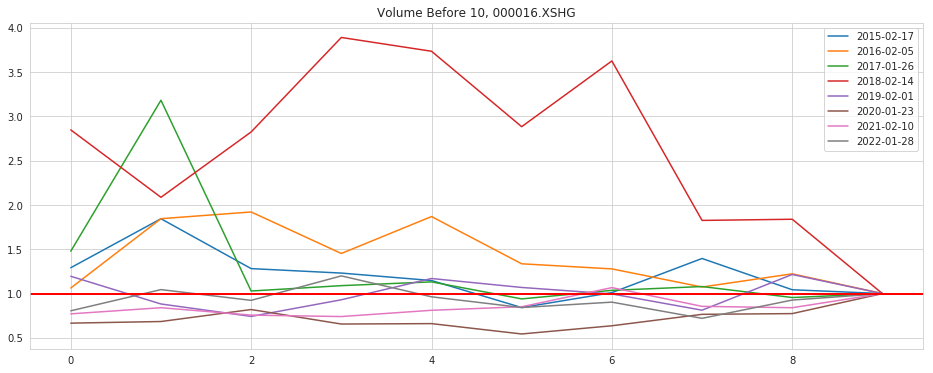

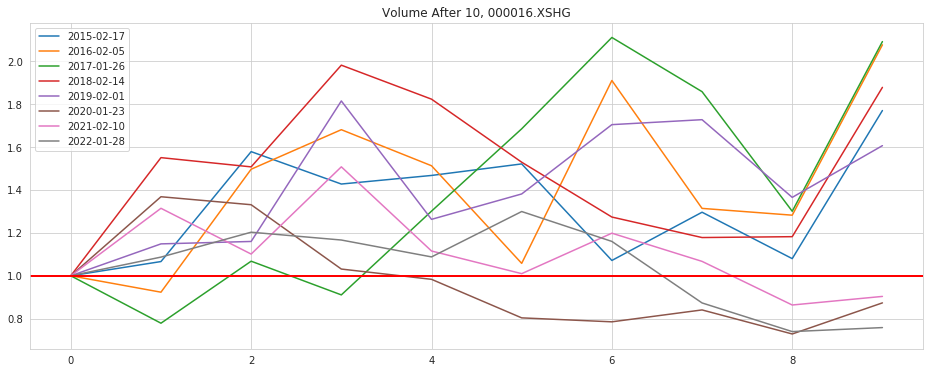

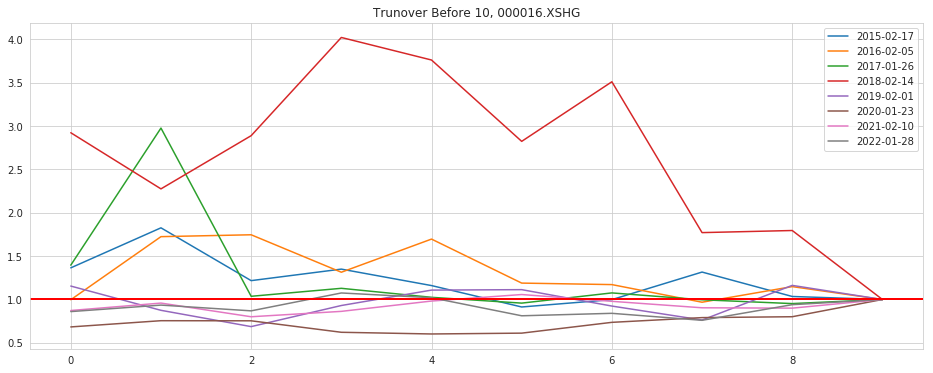

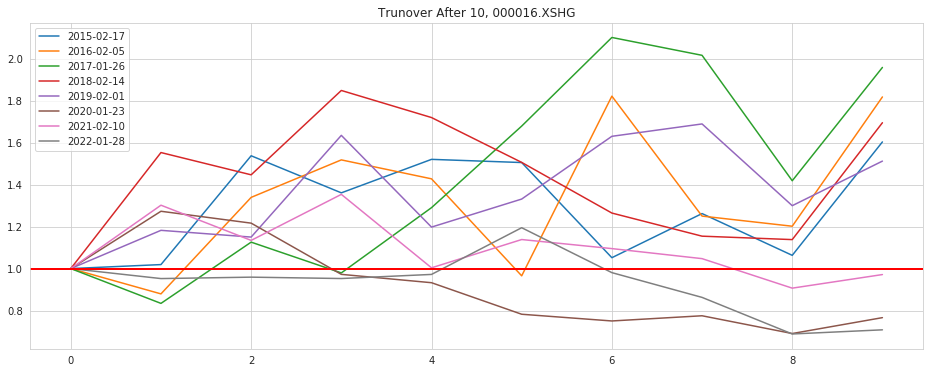

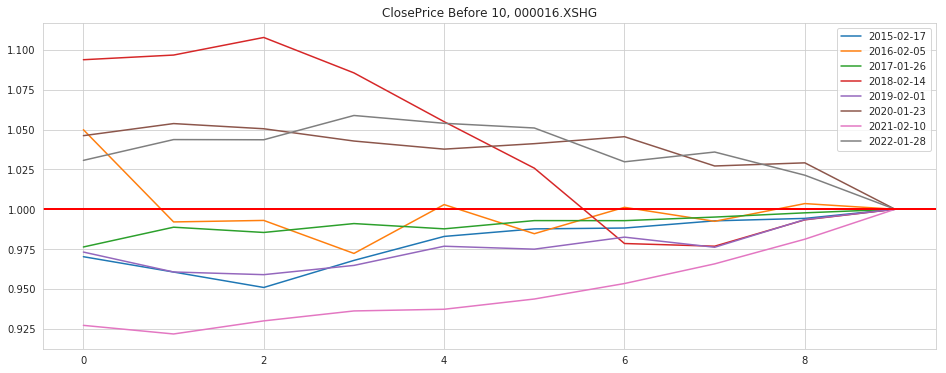

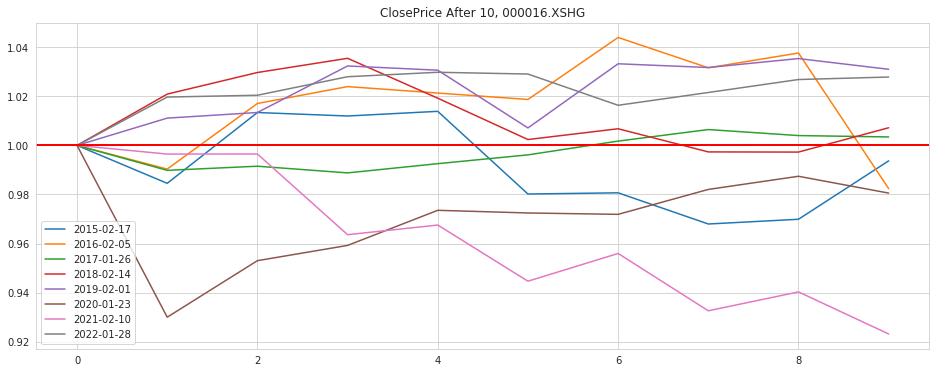

In [14]:
index_symbol = "000016.XSHG"
count_num = 10


pre_df = []
after_df = []
for date in row_df.index:
    start_date = row_df.loc[date, "date"].strftime("%Y-%m-%d")
    end_date = row_df.loc[date, "pre_date"].strftime("%Y-%m-%d")

    pre_row = get_price(index_symbol, end_date=end_date, count=count_num)
    pre_row = pre_row.reset_index(drop=False)["volume"]
    pre_row.name = end_date
    pre_df.append(pre_row)
    
    row = get_price(index_symbol, start_date=end_date, end_date="2023-01-08").iloc[:count_num]
    row = row.reset_index(drop=False)["volume"]
    row.name = end_date
    after_df.append(row)
pre_df = concat(pre_df, axis=1).T.dropna().T
after_df = concat(after_df, axis=1).T.dropna().T

pre_df = pre_df / pre_df.iloc[-1]
pre_df.plot(figsize=(16, 6), title="Volume Before {}, {}".format(count_num, index_symbol))
pyplot.axhline(1, color="r", linewidth=2)

after_df = after_df / after_df.iloc[0]
after_df.plot(figsize=(16, 6), title="Volume After {}, {}".format(count_num,index_symbol))
pyplot.axhline(1, color="r", linewidth=2)


pre_df = []
after_df = []
for date in row_df.index:
    start_date = row_df.loc[date, "date"].strftime("%Y-%m-%d")
    end_date = row_df.loc[date, "pre_date"].strftime("%Y-%m-%d")

    pre_row = get_price(index_symbol, end_date=end_date, count=count_num)
    pre_row = pre_row.reset_index(drop=False)["money"]
    pre_row.name = end_date
    pre_df.append(pre_row)
    
    row = get_price(index_symbol, start_date=end_date, end_date="2023-01-08").iloc[:count_num]
    row = row.reset_index(drop=False)["money"]
    row.name = end_date
    after_df.append(row)
pre_df = concat(pre_df, axis=1).T.dropna().T
after_df = concat(after_df, axis=1).T.dropna().T

pre_df = pre_df / pre_df.iloc[-1]
pre_df.plot(figsize=(16, 6), title="Trunover Before {}, {}".format(count_num,index_symbol))
pyplot.axhline(1, color="r", linewidth=2)

after_df = after_df / after_df.iloc[0]
after_df.plot(figsize=(16, 6), title="Trunover After {}, {}".format(count_num,index_symbol))
pyplot.axhline(1, color="r", linewidth=2)




pre_df = []
after_df = []
for date in row_df.index:
    start_date = row_df.loc[date, "date"].strftime("%Y-%m-%d")
    end_date = row_df.loc[date, "pre_date"].strftime("%Y-%m-%d")

    pre_row = get_price(index_symbol, end_date=end_date, count=count_num)
    pre_row = pre_row.reset_index(drop=False)["close"]
    pre_row.name = end_date
    pre_df.append(pre_row)
    
    row = get_price(index_symbol, start_date=end_date, end_date="2023-01-08").iloc[:count_num]
    row = row.reset_index(drop=False)["close"]
    row.name = end_date
    after_df.append(row)
pre_df = concat(pre_df, axis=1).T.dropna().T
after_df = concat(after_df, axis=1).T.dropna().T

pre_df = pre_df / pre_df.iloc[-1]
pre_df.plot(figsize=(16, 6), title="ClosePrice Before {}, {}".format(count_num,index_symbol))
pyplot.axhline(1, color="r", linewidth=2)

after_df = after_df / after_df.iloc[0]
after_df.plot(figsize=(16, 6), title="ClosePrice After {}, {}".format(count_num,index_symbol))
pyplot.axhline(1, color="r", linewidth=2)

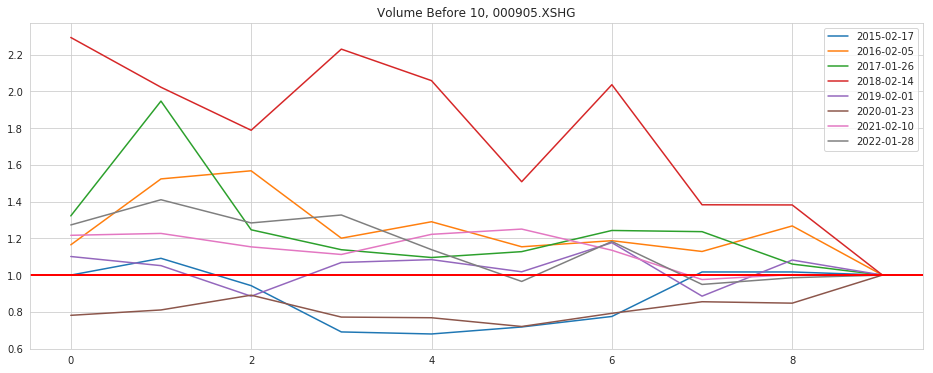

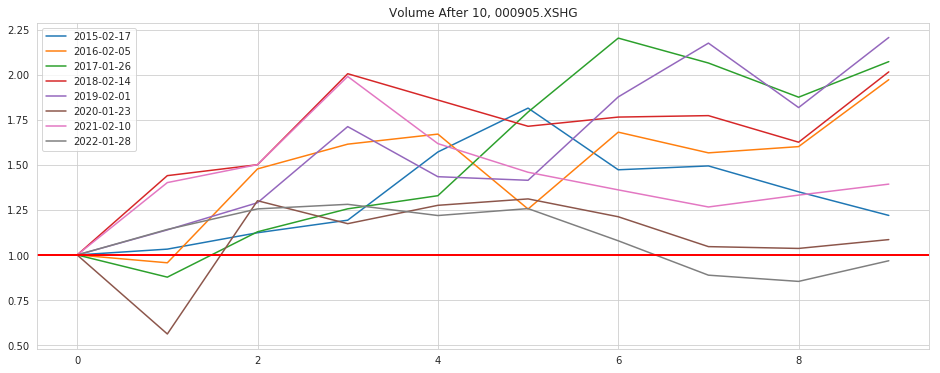

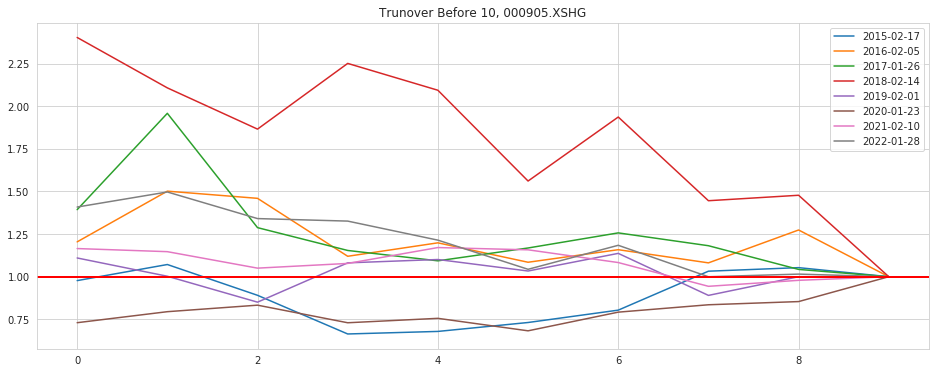

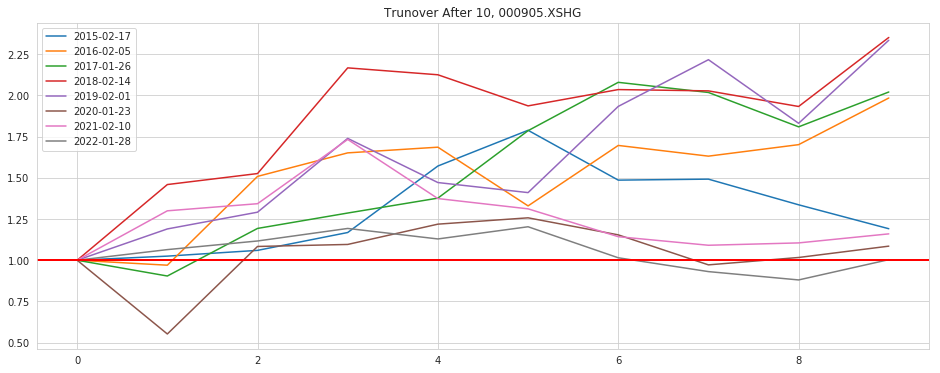

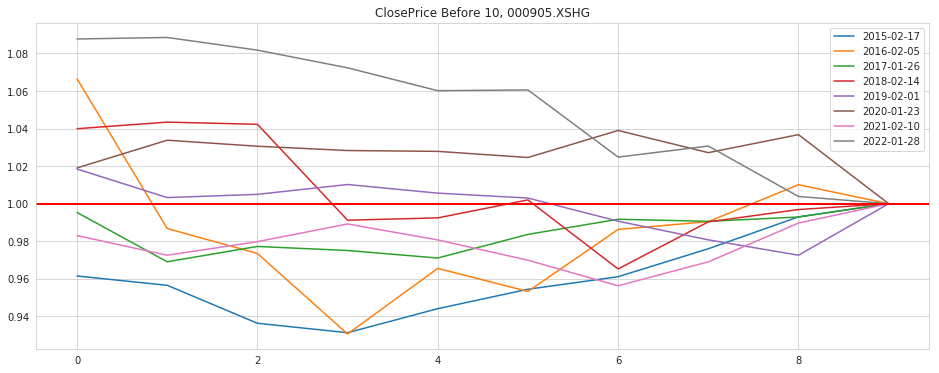

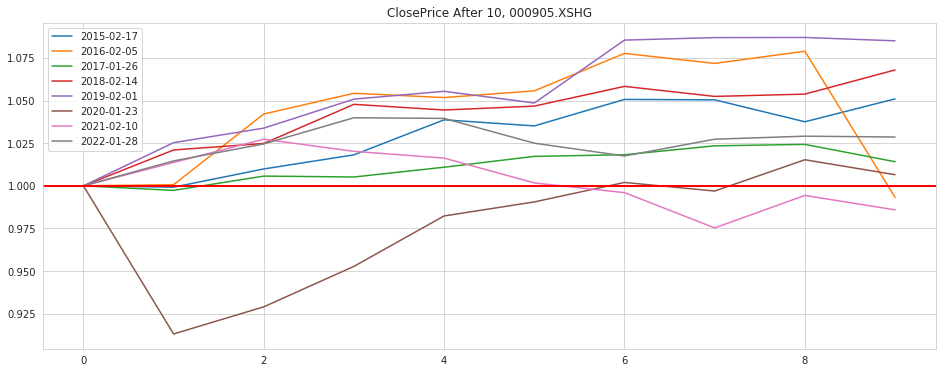

In [15]:
index_symbol = "000905.XSHG"
count_num = 10


pre_df = []
after_df = []
for date in row_df.index:
    start_date = row_df.loc[date, "date"].strftime("%Y-%m-%d")
    end_date = row_df.loc[date, "pre_date"].strftime("%Y-%m-%d")

    pre_row = get_price(index_symbol, end_date=end_date, count=count_num)
    pre_row = pre_row.reset_index(drop=False)["volume"]
    pre_row.name = end_date
    pre_df.append(pre_row)
    
    row = get_price(index_symbol, start_date=end_date, end_date="2023-01-08").iloc[:count_num]
    row = row.reset_index(drop=False)["volume"]
    row.name = end_date
    after_df.append(row)
pre_df = concat(pre_df, axis=1).T.dropna().T
after_df = concat(after_df, axis=1).T.dropna().T

pre_df = pre_df / pre_df.iloc[-1]
pre_df.plot(figsize=(16, 6), title="Volume Before {}, {}".format(count_num, index_symbol))
pyplot.axhline(1, color="r", linewidth=2)

after_df = after_df / after_df.iloc[0]
after_df.plot(figsize=(16, 6), title="Volume After {}, {}".format(count_num,index_symbol))
pyplot.axhline(1, color="r", linewidth=2)


pre_df = []
after_df = []
for date in row_df.index:
    start_date = row_df.loc[date, "date"].strftime("%Y-%m-%d")
    end_date = row_df.loc[date, "pre_date"].strftime("%Y-%m-%d")

    pre_row = get_price(index_symbol, end_date=end_date, count=count_num)
    pre_row = pre_row.reset_index(drop=False)["money"]
    pre_row.name = end_date
    pre_df.append(pre_row)
    
    row = get_price(index_symbol, start_date=end_date, end_date="2023-01-08").iloc[:count_num]
    row = row.reset_index(drop=False)["money"]
    row.name = end_date
    after_df.append(row)
pre_df = concat(pre_df, axis=1).T.dropna().T
after_df = concat(after_df, axis=1).T.dropna().T

pre_df = pre_df / pre_df.iloc[-1]
pre_df.plot(figsize=(16, 6), title="Trunover Before {}, {}".format(count_num,index_symbol))
pyplot.axhline(1, color="r", linewidth=2)

after_df = after_df / after_df.iloc[0]
after_df.plot(figsize=(16, 6), title="Trunover After {}, {}".format(count_num,index_symbol))
pyplot.axhline(1, color="r", linewidth=2)




pre_df = []
after_df = []
for date in row_df.index:
    start_date = row_df.loc[date, "date"].strftime("%Y-%m-%d")
    end_date = row_df.loc[date, "pre_date"].strftime("%Y-%m-%d")

    pre_row = get_price(index_symbol, end_date=end_date, count=count_num)
    pre_row = pre_row.reset_index(drop=False)["close"]
    pre_row.name = end_date
    pre_df.append(pre_row)
    
    row = get_price(index_symbol, start_date=end_date, end_date="2023-01-08").iloc[:count_num]
    row = row.reset_index(drop=False)["close"]
    row.name = end_date
    after_df.append(row)
pre_df = concat(pre_df, axis=1).T.dropna().T
after_df = concat(after_df, axis=1).T.dropna().T

pre_df = pre_df / pre_df.iloc[-1]
pre_df.plot(figsize=(16, 6), title="ClosePrice Before {}, {}".format(count_num,index_symbol))
pyplot.axhline(1, color="r", linewidth=2)

after_df = after_df / after_df.iloc[0]
after_df.plot(figsize=(16, 6), title="ClosePrice After {}, {}".format(count_num,index_symbol))
pyplot.axhline(1, color="r", linewidth=2)